## Отчет по лабораторной работе №1

###### работу выполнил: Соков Сергей Алексеевич
###### Вариант №3
###### Текст задания:
1. Удалите столбцы, ценность которых для оценки стоимости машины низка.
2. Удалите повторяющиеся строки, строки содержащие пропуски в данных.Выведите размер набора данных до и после удаления.
3. Удалите данные в строках, выходящие за некоторые пределы (год регистрации, цена, мощность двигателя). Выведите размер набора данных до и после удаления. Для оценки диапазонов значений признаков используйте BoxPlot.
4. Заполнить пропущенные данные в строковых полях.
5. Постройте гистограмму по маркам автомобилей, типам кузова и используемому топливу.
6. Добавьте в данные новый признак, который представляет собой длину названия автомобиля.
7. Постройте карту корреляций между признаками. Выведите также числовые значения признаков.
8. Определите коэффициент корреляции Пирсона и Спирмена между стоимостью автомобиля и типом кузова. Оцените значение p-value. Постройте плотность распределения признаков.
9. Добавьте в набор данных признак, являющийся суммой двух других признаков.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('autos.csv', encoding = 'cp1252')
df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


1. **Удаляю столбцы с низкой ценностью для оценки стоимости**

In [5]:
df.drop(['dateCrawled','seller','offerType','abtest','nrOfPictures','postalCode','lastSeen','dateCreated'],
        axis = 'columns', inplace = True)


2. **Удаляю повторяющиеся строки, строки содержащие пропуски в данных**

* **Удаление строк сожержащих пропуски в данных**

In [6]:
print("Изначальное количество автомобилей =", df.shape[0] + 1)

Изначальное количество автомобилей = 371529


In [7]:
df.dropna(inplace = True)
df

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
3,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja
6,Peugeot_206_CC_110_Platinum,2200,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein
7,VW_Derby_Bj_80__Scheunenfund,0,limousine,1980,manuell,50,andere,40000,7,benzin,volkswagen,nein
...,...,...,...,...,...,...,...,...,...,...,...,...
371520,turbo_defekt,3200,limousine,2004,manuell,225,leon,150000,5,benzin,seat,ja
371521,Opel_Zafira_1.6_Elegance_TÜV_12/16,1150,bus,2000,manuell,0,zafira,150000,3,benzin,opel,nein
371524,Smart_smart_leistungssteigerung_100ps,1199,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein
371525,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein


* **Удаление повторяющихся строк**

In [8]:
df.drop_duplicates(['name','price','vehicleType','yearOfRegistration',
                             'gearbox','powerPS','model','kilometer',
                             'monthOfRegistration','fuelType','brand',
                    'notRepairedDamage'], inplace = True)
df

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
3,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja
6,Peugeot_206_CC_110_Platinum,2200,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein
7,VW_Derby_Bj_80__Scheunenfund,0,limousine,1980,manuell,50,andere,40000,7,benzin,volkswagen,nein
...,...,...,...,...,...,...,...,...,...,...,...,...
371518,Bmw_320_D_DPF_Touring_!!!,3999,kombi,2005,manuell,3,3er,150000,5,diesel,bmw,nein
371520,turbo_defekt,3200,limousine,2004,manuell,225,leon,150000,5,benzin,seat,ja
371524,Smart_smart_leistungssteigerung_100ps,1199,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein
371525,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein


In [19]:
print("Количество автомобилей после удаления дубликатов и пропусков =", df.shape[0] + 1)


Количество автомобилей после удаления дубликатов и пропусков = 254922


3. **Удалите данные в строках, выходящие за некоторые пределы (год регистрации, цена, мощность двигателя). Выведите размер набора данных до и после удаления. Для оценки диапазонов значений признаков используйте BoxPlot.**

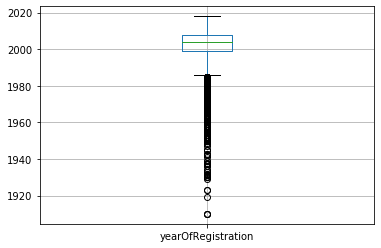

In [10]:
yearboxplot = df.boxplot(column=['yearOfRegistration'])

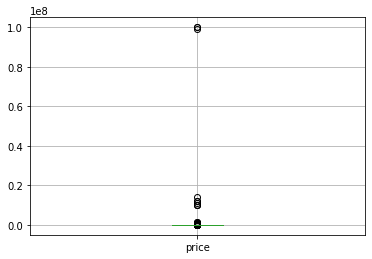

In [11]:
priceboxplot = df.boxplot(column=['price'])

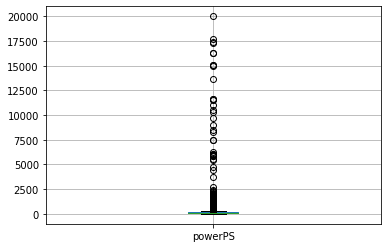

In [12]:
powerboxplot = df.boxplot(column=['powerPS'])

In [13]:
sortdf = df[
        (df.yearOfRegistration <= 2016) 
      & (df.yearOfRegistration >= 1950) 
      & (df.price >= 100) 
      & (df.price <= 150000) 
      & (df.powerPS >= 10) 
      & (df.powerPS <= 500)]

In [14]:
sortdf.reset_index(drop = True)
sortdf
print("Количество автомобилей после удаления машин выходящих за пределы", sortdf.shape[0] + 1)

Количество автомобилей после удаления машин выходящих за пределы 241388


4. **Заполнить пропущенные данные в строковых полях**

In [15]:
sortdf2 = sortdf
sortdf2.isnull().sum()

name                   0
price                  0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dtype: int64

5. **Постройте гистограмму по маркам автомобилей, типам кузова и используемому топливу**

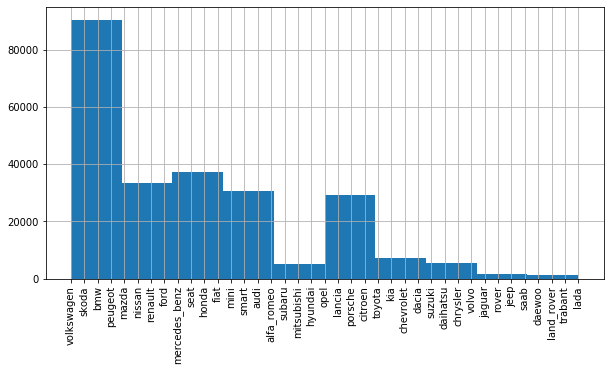

In [16]:
sortdf2['brand'].hist(xrot = 90,figsize = (10,5))

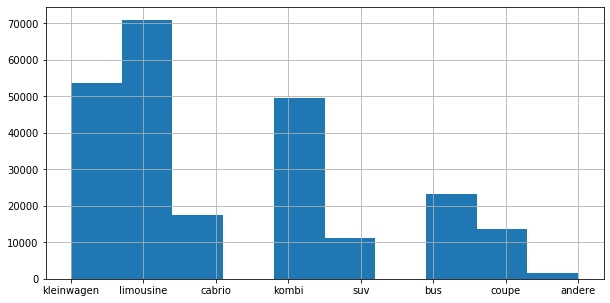

In [17]:
sortdf2['vehicleType'].hist(figsize = (10,5))

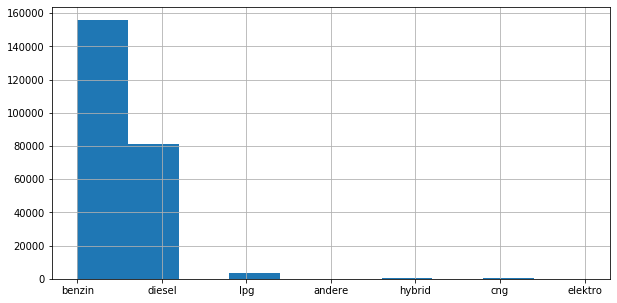

In [18]:
sortdf2['fuelType'].hist(figsize = (10,5))

6. **Добавьте в данные новый признак, который представляет собой длину названия автомобиля**

In [54]:
sortdf2.reset_index(inplace = False)
sortdf2['namesize'] = [len(n) for n in sortdf2['name']]
sortdf2[['name','namesize']]

f:\pj\venv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,name,namesize
3,GOLF_4_1_4__3TÜRER,18
4,Skoda_Fabia_1.4_TDI_PD_Classic,30
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,50
6,Peugeot_206_CC_110_Platinum,27
10,Mazda_3_1.6_Sport,17
...,...,...
371517,Volkswagen_Golf_2.0_TDI_DPF_Team,32
371520,turbo_defekt,12
371524,Smart_smart_leistungssteigerung_100ps,37
371525,Volkswagen_Multivan_T4_TDI_7DC_UY2,34


7. **Постройте карту корреляций между признаками. Выведите также числовые значения признаков**

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,namesize
price,1.000000,0.451642,0.575839,-0.461691,0.016608,0.068137
yearOfRegistration,0.451642,1.000000,0.208924,-0.417308,0.021489,0.067551
powerPS,0.575839,0.208924,1.000000,-0.008716,0.021354,0.036464
kilometer,-0.461691,-0.417308,-0.008716,1.000000,-0.002982,-0.037535
monthOfRegistration,0.016608,0.021489,0.021354,-0.002982,1.000000,0.005385
namesize,0.068137,0.067551,0.036464,-0.037535,0.005385,1.000000


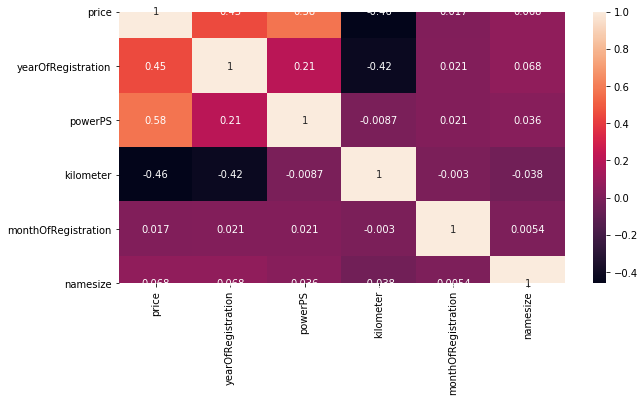

In [59]:
plt.figure(figsize=(10,5))
sns.heatmap(sortdf2.corr(), annot = True)

sortdf2.corr()


In [60]:
sortdf2.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:]

powerPS                0.575839
kilometer              0.461691
yearOfRegistration     0.451642
namesize               0.068137
monthOfRegistration    0.016608
Name: price, dtype: float64

8. **Определите коэффициент корреляции Пирсона и Спирмена между стоимостью автомобиля и типом кузова. Оцените значение p-value. Постройте плотность распределения признаков**

Коэффициент корреляции Пирсона:  7.52170362608034e-07
Коэффициент корреляции Спирмена:  7.672166486775973e-73
p-value - нормальное значение


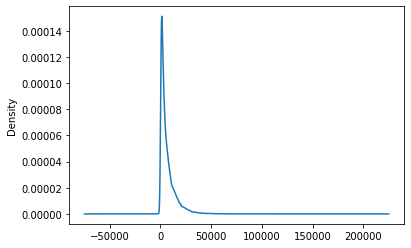

In [77]:
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

carcoder = pd.Series(label_encoder.fit_transform(sortdf2['vehicleType']))
pearson = stats.pearsonr(sortdf2['price'],carcoder)
spearm = stats.spearmanr(sortdf2['price'],carcoder)
print("Коэффициент корреляции Пирсона: ",pearson[1])
print("Коэффициент корреляции Спирмена: ",spearm[1])



if (spearm[1] < 0.05):
    print("p-value - нормальное значение")
else:
    print("p-value - ненормальное значение")
    
graph = pd.Series(sortdf2['price'])
graph.plot.kde()

9. **Добавьте в набор данных признак, являющийся суммой двух других признаков**

In [81]:
sortdf2['price+kilometer'] = [n for n in (sortdf2['gearbox'] + " " + sortdf2['vehicleType']) ]
sortdf2

f:\pj\venv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,namesize,price+kilometer
3,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,18,manuell kleinwagen
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,30,manuell kleinwagen
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,ja,50,manuell limousine
6,Peugeot_206_CC_110_Platinum,2200,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,27,manuell cabrio
10,Mazda_3_1.6_Sport,2000,limousine,2004,manuell,105,3_reihe,150000,12,benzin,mazda,nein,17,manuell limousine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371517,Volkswagen_Golf_2.0_TDI_DPF_Team,7900,limousine,2010,manuell,140,golf,150000,7,diesel,volkswagen,nein,32,manuell limousine
371520,turbo_defekt,3200,limousine,2004,manuell,225,leon,150000,5,benzin,seat,ja,12,manuell limousine
371524,Smart_smart_leistungssteigerung_100ps,1199,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,37,automatik cabrio
371525,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,34,manuell bus
